In [17]:
import pandas as pd 
def space_bodies():
    response = requests.get('https://api.le-systeme-solaire.net/rest/bodies/')
    data = response.json()['bodies']
    return data

def count_body_types(df):
    counts = df.groupby('bodyType').size().to_frame('count').reset_index()
    return counts

data = space_bodies()
df = pd.DataFrame(data)

count_body_types(df)

,bodyType,count
0,Asteroid,44
1,Comet,4
2,Dwarf Planet,4
3,Moon,305
4,Planet,8
5,Star,1


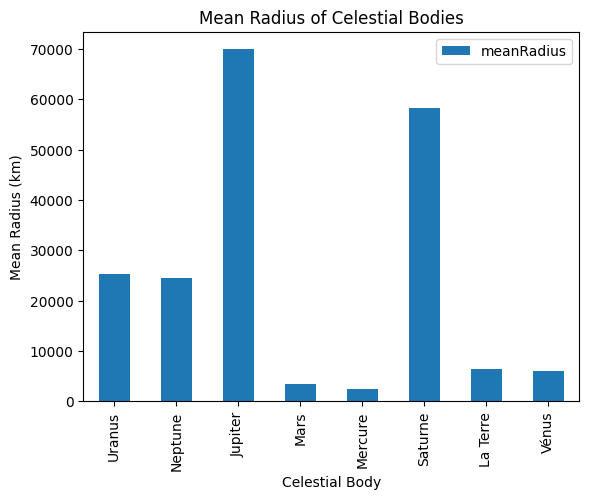

In [2]:
def fetch_data():
    response = requests.get('https://api.le-systeme-solaire.net/rest/bodies/')
    data = response.json()['bodies']
    planets = [body for body in data if body['isPlanet'] is True]
    return planets

data = fetch_data()
df = pd.DataFrame(data)
df = df[['name', 'meanRadius']].dropna()

visualize_data(df)

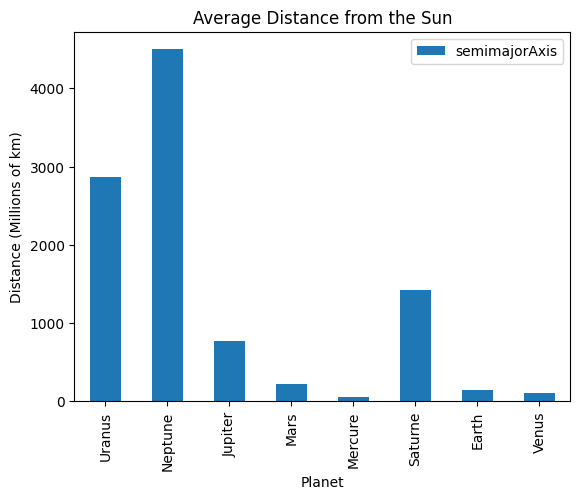

In [5]:
def fetch_data():
    response = requests.get('https://api.le-systeme-solaire.net/rest/bodies/')
    data = response.json()['bodies']
    planets = [body for body in data if body['isPlanet'] is True]
    return planets

def visualize_data(df):
    df['semimajorAxis'] = df['semimajorAxis'] / 1_000_000  # convert to millions of km
    df.plot(kind='bar', x='name', y='semimajorAxis')
    plt.title('Average Distance from the Sun')
    plt.xlabel('Planet')
    plt.ylabel('Distance (Millions of km)')
    plt.show()

data = fetch_data()
df = pd.DataFrame(data)
df = df[['name', 'semimajorAxis']].dropna()

# Rename planets
df['name'] = df['name'].replace({'La Terre': 'Earth', 'Vénus': 'Venus'})

visualize_data(df)

In [21]:
def fetch_star_data():
    response = requests.get('https://api.arcsecond.io/exoplanets/')
    star_data = response.json()['results']
    return star_data

star_data = fetch_star_data()
df = pd.DataFrame(star_data)


# Count distinct 'name' values
distinct_name_count = df['name'].nunique()
print(f"There are {distinct_name_count} stars in the dataframe.")

There are 200 stars in the dataframe.
